In [72]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import os 
from scipy.signal import savgol_filter
from scipy.signal import medfilt2d
import scipy.io as sio
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import cv2
import numpy.matlib
import scipy
import librosa
import librosa.display
import soundfile as sf
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


from Aureas import Metodologia,lamda_unsup,segmentacion,time_and_date,findeccentricity,seg_xie,fcc5
from Aureas import without_subband_mode_intensities
from Aureas import smooth
from Aureas import ZscoreMV
from Aureas import segmentacion

## funcion metodologia, segmentacion_Aureas

In [106]:
root="E:\pythin_videos\Ecoacustica"
#banda = [0,20000]
banda=["min","max"]
canal = 1
autosel = 0
visualize = 0

table,datos_clasifi,mean_class,infoZC,gadso,repre,dispersion,frecuencia,recon= Metodologia(root, banda, canal, autosel, visualize)

In [107]:
# Calcular número de clases
n_clases = len(np.unique(recon))

# Imprimir número de clases
print('Número de clases clusterizadas:', n_clases)


Número de clases clusterizadas: 13


## crear segsieg

In [108]:
x, fs = sf.read("G58_20180704_050000.wav")
if len(x.shape) == 1:
    senal_audio = x
else:
    x = x.mean(axis=1)
    x = np.squeeze(x)
    senal_audio = x

frecuency,time,intensity=signal.spectrogram(senal_audio,fs=fs,nfft=2048,nperseg=569,noverlap=0)

# Call seg_xie function
segm_xie,segmentos_nor=seg_xie(intensity,time,frecuency)
with_suband=cv2.imread("seg_xie.png",0) 

# crear datafreme

In [111]:
# Obtener las posiciones 5, 6, 10 y 9 de la tabla
segmensor_nor_table = table[:, [0,5, 6, 10, 9,13]]
# Convertir el array en un DataFrame
df = pd.DataFrame(segmensor_nor_table, columns=["audio",'TiempoInicial', 'TiempoFinal', 
                                                'FrecuenciaInicial', 'FrecuenciaFinal', 'Etiqueta'])

# Mostrar el DataFrame
print(df)

                       audio TiempoInicial TiempoFinal FrecuenciaInicial  \
0    G34_20180618_123200.wav     24.585703   24.792143        301.464844   
1    G34_20180618_123200.wav     35.875385   36.339875         344.53125   
2    G34_20180618_123200.wav     23.011599   23.166429        366.064453   
3    G34_20180618_123200.wav     31.875612   33.423912        409.130859   
4    G34_20180618_123200.wav     21.063322   21.372982        409.130859   
..                       ...           ...         ...               ...   
981  G58_20180704_093600.wav      1.193481    1.438628      14276.513672   
982  G58_20180704_093600.wav     58.506361   58.854728      15460.839844   
983  G58_20180704_093600.wav     19.153753   20.353685      15568.505859   
984  G58_20180704_093600.wav      59.02246   59.370828      15654.638672   
985  G58_20180704_093600.wav     59.628878   59.809512      15869.970703   

    FrecuenciaFinal Etiqueta  
0         21.533203      0.0  
1         21.533203      

## todos los cluster dentro de la imageen que se le creo segxie

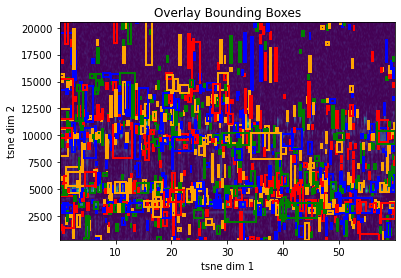

In [112]:

# Obtener los límites de las coordenadas de los bounding boxes
xmin = df['TiempoInicial'].min()
xmax = df['TiempoFinal'].max()
ymin = df['FrecuenciaInicial'].min()
ymax = df['FrecuenciaFinal'].max()

# Definir los límites del espectrograma en el eje x (tiempo) y en el eje y (frecuencia)
ext = [xmin, xmax, ymin, ymax]
fig, ax = plt.subplots()

# Trazar el espectrograma original (with_suband) como fondo
ax.imshow(with_suband, origin='lower', extent=ext, aspect='auto',)

# Recorrer los bounding boxes y dibujarlos en el gráfico
label_colors = ['red', 'blue', 'green', 'orange']  # Colores para cada etiqueta
for index, row in df.iterrows():
    x = row['TiempoInicial']
    y = row['FrecuenciaInicial']
    width = row['TiempoFinal'] - row['TiempoInicial']
    height = row['FrecuenciaFinal'] - row['FrecuenciaInicial']
    
    # Obtener la etiqueta del bounding box
    label = row['Etiqueta']
    
    # Obtener el índice del color correspondiente a la etiqueta
    label_index = index % len(label_colors)
    color = label_colors[label_index]
    
    # Crear el rectángulo del bounding box
    rect = Rectangle((x, y), width, height, edgecolor=color, linewidth=2, fill=False)
    
    # Agregar el rectángulo al eje
    ax.add_patch(rect)
    
    # Agregar la etiqueta al rectángulo
    #ax.text(x, y, label, color=color, fontsize=8, verticalalignment='bottom')
    
# Configurar etiquetas y títulos del gráfico
ax.set_xlabel('tsne dim 1')
ax.set_ylabel('tsne dim 2')
ax.set_title('Overlay Bounding Boxes')
plt.show()


## todo lo cluester en blanco y negro 

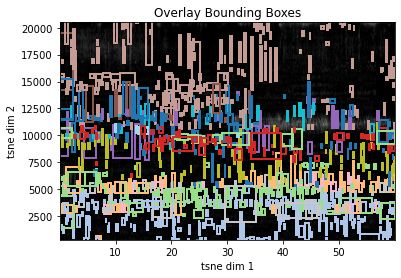

Cantidad de clases únicas: 13


In [99]:

# Obtener los límites de las coordenadas de los bounding boxes
xmin = df['TiempoInicial'].min()
xmax = df['TiempoFinal'].max()
ymin = df['FrecuenciaInicial'].min()
ymax = df['FrecuenciaFinal'].max()

# Crear una figura y un eje
# Definir los límites del espectrograma en el eje x (tiempo) y en el eje y (frecuencia)
ext = [xmin, xmax, ymin, ymax]
fig, ax = plt.subplots()

# Trazar el espectrograma original (with_suband) como fondo
ax.imshow(with_suband, origin='upper', extent=ext, aspect='auto', cmap='gray', vmin=0, vmax=60)

# Recorrer los bounding boxes y dibujarlos en el gráfico
unique_labels = df['Etiqueta'].unique()
label_colors = plt.cm.get_cmap('tab20', len(unique_labels))  # Colormap con colores únicos para cada etiqueta
for index, row in df.iterrows():
    x = row['TiempoInicial']
    y = row['FrecuenciaInicial']
    width = row['TiempoFinal'] - row['TiempoInicial']
    height = row['FrecuenciaFinal'] - row['FrecuenciaInicial']
    
    # Obtener la etiqueta del bounding box
    label = row['Etiqueta']
    
    # Obtener el índice del color correspondiente a la etiqueta
    label_index = list(unique_labels).index(label)
    color = label_colors(label_index)
    
    # Crear el rectángulo del bounding box
    rect = Rectangle((x, y), width, height, edgecolor=color, linewidth=2, fill=False)
    
    # Agregar el rectángulo al eje
    ax.add_patch(rect)
    
    # Obtener la cantidad de clases únicas
    num_unique_labels = len(unique_labels)
    
# Configurar etiquetas y títulos del gráfico
ax.set_xlabel('tsne dim 1')
ax.set_ylabel('tsne dim 2')
ax.set_title('Overlay Bounding Boxes')
plt.show()
print("Cantidad de clases únicas:", num_unique_labels)

## para analizar solo un cluster dentro de un audio

In [104]:
x, fs = sf.read("G58_20180704_092000.wav")
if len(x.shape) == 1:
    senal_audio = x
else:
    x = x.mean(axis=1)
    x = np.squeeze(x)
    senal_audio = x

frecuency,time,intensity=signal.spectrogram(senal_audio,fs=fs,nfft=2048,nperseg=569,noverlap=0)

# Call seg_xie function
segm_xie,segmentos_nor=seg_xie(intensity,time,frecuency)
with_suband=cv2.imread("seg_xie.png",0) 

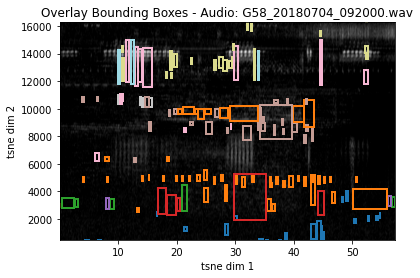

Cantidad de clases únicas para el audio G58_20180704_092000.wav: 10


In [105]:

# Especifica el nombre del audio que deseas analizar
audio_seleccionado = 'G58_20180704_092000.wav'

# Filtra el DataFrame para obtener solo las filas relacionadas con el audio seleccionado
df_audio_seleccionado = df[df['audio'] == audio_seleccionado]

# Obtener los límites de las coordenadas de los bounding boxes solo para el audio seleccionado
xmin = df_audio_seleccionado['TiempoInicial'].min()
xmax = df_audio_seleccionado['TiempoFinal'].max()
ymin = df_audio_seleccionado['FrecuenciaInicial'].min()
ymax = df_audio_seleccionado['FrecuenciaFinal'].max()

# Crear una figura y un eje
# Definir los límites del espectrograma en el eje x (tiempo) y en el eje y (frecuencia)
ext = [xmin, xmax, ymin, ymax]
fig, ax = plt.subplots()

# Trazar el espectrograma original (with_suband) como fondo
ax.imshow(with_suband, origin='upper', extent=ext, aspect='auto', cmap='gray', vmin=0, vmax=60)

# Recorrer los bounding boxes y dibujarlos en el gráfico solo para el audio seleccionado
unique_labels = df_audio_seleccionado['Etiqueta'].unique()
label_colors = plt.cm.get_cmap('tab20', len(unique_labels))  # Colormap con colores únicos para cada etiqueta
for index, row in df_audio_seleccionado.iterrows():
    x = row['TiempoInicial']
    y = row['FrecuenciaInicial']
    width = row['TiempoFinal'] - row['TiempoInicial']
    height = row['FrecuenciaFinal'] - row['FrecuenciaInicial']
    
    # Obtener la etiqueta del bounding box
    label = row['Etiqueta']
    
    # Obtener el índice del color correspondiente a la etiqueta
    label_index = list(unique_labels).index(label)
    color = label_colors(label_index)
    
    # Crear el rectángulo del bounding box
    rect = Rectangle((x, y), width, height, edgecolor=color, linewidth=2, fill=False)
    
    # Agregar el rectángulo al eje
    ax.add_patch(rect)

# Configurar etiquetas y títulos del gráfico
ax.set_xlabel('tsne dim 1')
ax.set_ylabel('tsne dim 2')
ax.set_title(f'Overlay Bounding Boxes - Audio: {audio_seleccionado}')

# Mostrar el gráfico
plt.show()

# Imprimir la cantidad de clases únicas solo para el audio seleccionado
num_unique_labels = len(unique_labels)
print(f"Cantidad de clases únicas para el audio {audio_seleccionado}: {num_unique_labels}")
